Steigung [V/Hz] =  0.6357796560256483 , Standardfehler =  0.013607457052426549
Nullspannung [V] =  -0.09742579478819292 , Standardfehler =  0.1340837992595958


Chi-Quadrat =  1.2022286564016997
Freiheitsgrade =  3
Chi-Quadrat reduziert =  0.40074288546723325
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten= 75.0%


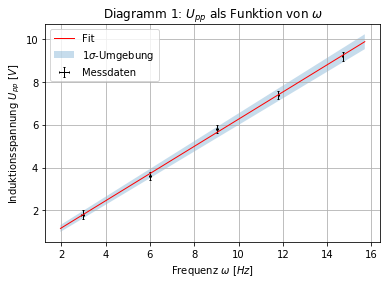

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import odr
from scipy.stats import chi2

#Werte aus Tabelle 1: U_m über f

f = np.array([2.96,6.02,9.01,11.8,14.7])
fehler_f = np.array([0.05,0.05,0.05,0.01,0.01])

U_m = np.array([0.9,1.8,2.9,3.7,4.6])
fehler_U_m = np.array([0.1,0.1,0.1,0.1,0.1])

U_pp = 2*U_m
fehler_U_pp = 2*fehler_U_m

#Fit von Messwerten 

def reg(p, x):
    (a, b) = p
    return a*x+b

# Model
model_func = odr.Model(reg)

#Messdaten
x=f
y=U_pp
delta_x = fehler_f
delta_y = fehler_U_pp


#Messdaten einlesen
data = odr.RealData(x, y, sx=delta_x, sy=delta_y)

#Model und Daten verknüpfen
odr = odr.ODR(data, model_func, beta0=[1.0, 1.0])

#Regression
out = odr.run()

#1-Sigma
popt = out.beta
perr = out.sd_beta

#Sigma-Umgebung
nstd = 1 # um n-Sigma-Umgebung zu zeichnen
popt_top = popt + nstd * perr
popt_bot = popt - nstd * perr

#Plot-Umgebung
x_fit = np.linspace(min(x)-1, max(x)+1, 100)
fit = reg(popt, x_fit)
fit_top = reg(popt_top, x_fit)
fit_bot = reg(popt_bot, x_fit)

#Plot
fig, ax = plt.subplots(1)
plt.errorbar(x, y, yerr=delta_y, xerr=delta_x, lw= 1, ecolor='k', fmt='none', capsize=1, label='Messdaten')
plt.title('Diagramm 1: '+r'${U_{pp}}$' + ' als Funktion von ' + r'$\omega$')
plt.grid(True)
plt.xlabel('Frequenz '+r'$\omega$'+' '+r'${[Hz]}$')
plt.ylabel('Induktionsspannung '+r'${U_{pp}}$' + ' '+r'${[V]}$')
plt.plot(x_fit, fit, 'r', lw=1, label='Fit')
ax.fill_between(x_fit, fit_top, fit_bot, alpha=.25, label=str(nstd)+r'$\sigma$'+'-Umgebung')
plt.legend(loc='best')

#Output
plt.savefig("figures/245_Diagramm1.pdf", format="pdf")

#Chi-Quadrat
dof=f.size-popt.size
chisquare=np.sum(((reg([*popt], x)-y)/delta_y)**2)
chisquare_red=chisquare/dof
prob=round(1-chi2.cdf(chisquare,dof),2)*100

#Ausgabe
print("Steigung [V/Hz] = ", popt[0], ", Standardfehler = ", perr[0])
print("Nullspannung [V] = ", popt[1], ", Standardfehler = ", perr[1])
print('\n')
print("Chi-Quadrat = ", chisquare)
print("Freiheitsgrade = ", dof)
print("Chi-Quadrat reduziert = ", chisquare_red)
print("Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten= "+str(prob)+"%")


Steigung [V/A] =  1.3780803393226733 , Standardfehler =  0.03431204247559972
Nullspannung [V] =  0.1802311865872918 , Standardfehler =  0.06287338789282541


Chi-Quadrat =  18.42016491914422
Freiheitsgrade =  7
Chi-Quadrat reduziert =  2.6314521313063173
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten= 1.0%


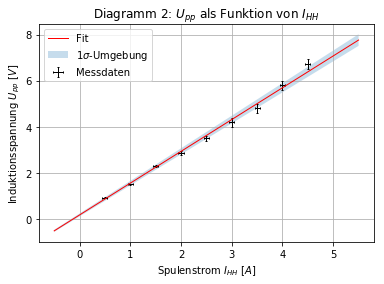

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import odr
from scipy.stats import chi2

#Werte aus Tabelle 2: U_m über I_HH

I_HH = np.array([0.50, 1.00, 1.50, 2.00, 2.50, 3.00, 3.50, 4.00, 4.50])
fehler_I_HH = np.array([ 0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.05])

U_m = np.array([0.46,0.76,1.15,1.44,1.75,2.1,2.4,2.9,3.36])
fehler_U_m = np.array([0.01,0.01,0.02,0.04,0.05,0.1,0.1,0.1,0.1])

U_pp = 2*U_m
fehler_U_pp = 2*fehler_U_m

#Fit von Messwerten 

def reg(p, x):
    (a, b) = p
    return a*x+b

# Model
model_func = odr.Model(reg)

#Messdaten
x=I_HH
y=U_pp
delta_x = fehler_I_HH
delta_y = fehler_U_pp


#Messdaten einlesen
data = odr.RealData(x, y, sx=delta_x, sy=delta_y)

#Model und Daten verknüpfen
odr = odr.ODR(data, model_func, beta0=[1.0, 1.0])

#Regression
out = odr.run()

#1-Sigma
popt = out.beta
perr = out.sd_beta

#Sigma-Umgebung
nstd = 1 # um n-Sigma-Umgebung zu zeichnen
popt_top = popt + nstd * perr
popt_bot = popt - nstd * perr

#Plot-Umgebung
x_fit = np.linspace(min(x)-1, max(x)+1, 100)
fit = reg(popt, x_fit)
fit_top = reg(popt_top, x_fit)
fit_bot = reg(popt_bot, x_fit)

#Plot
fig, ax = plt.subplots(1)
plt.errorbar(x, y, yerr=delta_y, xerr=delta_x, lw= 1, ecolor='k', fmt='none', capsize=1, label='Messdaten')
plt.title('Diagramm 2: '+r'${U_{pp}}$'+' als Funktion von '+r'${I_{HH}}$')
plt.grid(True)
plt.xlabel('Spulenstrom '+r'${I_{HH}}$'+' '+r'${[A]}$')
plt.ylabel('Induktionsspannung '+r'${U_{pp}}$' + ' ' + r'${[V]}$')
plt.plot(x_fit, fit, 'r', lw=1, label='Fit')
ax.fill_between(x_fit, fit_top, fit_bot, alpha=.25, label=str(nstd)+r'$\sigma$'+'-Umgebung')
plt.legend(loc='best')

#Output
plt.savefig("figures/245_Diagramm2.pdf", format="pdf")

#Chi-Quadrat
dof=x.size-popt.size
chisquare=np.sum(((reg([*popt], x)-y)/delta_y)**2)
chisquare_red=chisquare/dof
prob=round(1-chi2.cdf(chisquare,dof),2)*100

#Ausgabe
print("Steigung [V/A] = ", popt[0], ", Standardfehler = ", perr[0])
print("Nullspannung [V] = ", popt[1], ", Standardfehler = ", perr[1])
print('\n')
print("Chi-Quadrat = ", chisquare)
print("Freiheitsgrade = ", dof)
print("Chi-Quadrat reduziert = ", chisquare_red)
print("Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten= "+str(prob)+"%")


Amplitude [V] =  4.768431216467123 , Standardfehler =  0.021186837768468563
Ausgangswinkel [°] =  -0.981911428502888 , Standardfehler =  0.6588325317219716
Untergrundspannung [V] =  -0.1231631314674312 , Standardfehler =  0.01975967706206923


Chi-Quadrat =  62.56518475258636
Freiheitsgrade =  9
Chi-Quadrat reduziert =  6.951687194731818
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten= 0.0%


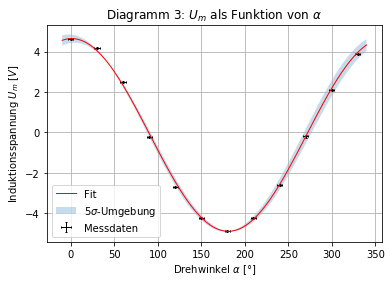

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import odr
from scipy.stats import chi2

#Werte aus Tabelle 3: U_m über alpha

alpha=np.array([0,30,60,90,120,150,180,210,240,270,300,330])
fehler_alpha=np.array([3,3,3,3,3,3,3,3,3,3,3,3])

U_m=np.array([4.64,4.16,2.48,-0.23,-2.70,-4.24,-4.88,-4.24,-2.60,-0.20,2.12,3.88])
fehler_U_m=np.array([0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05])

#Fit von Messwerten 

def reg(p, x):
    (a, b, c) = p
    return a*np.cos((x+b)*np.pi/180)+c

# Model
model_func = odr.Model(reg)

#Messdaten
x=alpha
y=U_m
delta_x = fehler_alpha
delta_y = fehler_U_m


#Messdaten einlesen
data = odr.RealData(x, y, sx=delta_x, sy=delta_y)

#Model und Daten verknüpfen
odr = odr.ODR(data, model_func, beta0=[1.0, 1.0, 1.0])

#Regression
out = odr.run()

#1-Sigma
popt = out.beta
perr = out.sd_beta

#Sigma-Umgebung
nstd = 5 # um n-Sigma-Umgebung zu zeichnen
popt_top = popt + nstd * perr
popt_bot = popt - nstd * perr

#Plot-Umgebung
x_fit = np.linspace(min(x)-10, max(x)+10, 100)
fit = reg(popt, x_fit)
fit_top = reg(popt_top, x_fit)
fit_bot = reg(popt_bot, x_fit)

#Plot
fig, ax = plt.subplots(1)
plt.errorbar(x, y, yerr=delta_y, xerr=delta_x, lw= 1, ecolor='k', fmt='none', capsize=1, label='Messdaten')
plt.title('Diagramm 3: '+r'${U_m}$'+' als Funktion von '+r'$\alpha$')
plt.grid(True)
plt.xlabel('Drehwinkel '+r'$\alpha$'+' '+r'${[°]}$')
plt.ylabel('Induktionsspannung '+r'${U_m}$' + ' ' + r'${[V]}$')
plt.plot(x_fit, fit, 'r', lw=1, label='Fit')
ax.fill_between(x_fit, fit_top, fit_bot, alpha=.25, label=str(nstd)+r'$\sigma$'+'-Umgebung')
plt.legend(loc='best')

#Output
plt.savefig("figures/245_Diagramm3.pdf", format="pdf")

#Chi-Quadrat
dof=x.size-popt.size
chisquare=np.sum(((reg([*popt], x)-y)/delta_y)**2)
chisquare_red=chisquare/dof
prob=round(1-chi2.cdf(chisquare,dof),2)*100

#Ausgabe
print("Amplitude [V] = ", popt[0], ", Standardfehler = ", perr[0])
print("Ausgangswinkel [°] = ", popt[1], ", Standardfehler = ", perr[1])
print("Untergrundspannung [V] = ", popt[2], ", Standardfehler = ", perr[2])
print('\n')
print("Chi-Quadrat = ", chisquare)
print("Freiheitsgrade = ", dof)
print("Chi-Quadrat reduziert = ", chisquare_red)
print("Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten= "+str(prob)+"%")

R_2/R_HH =  0.816544318979079 , Standardfehler =  0.001089061039241941
L_2/R_HH [s]=  6.798774186287494e-05 , Standardfehler =  8.294132659518005e-06
L_HH/R_HH [s]=  13.065292675598439 , Standardfehler =  0.25914661572085657


Chi-Quadrat =  43.14137547166356
Freiheitsgrade =  16
Chi-Quadrat reduziert =  2.6963359669789724
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten= 0.0%


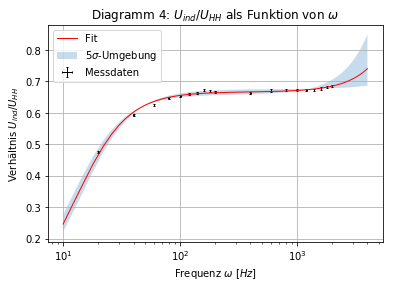

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import odr
from scipy.stats import chi2

#Werte aus Tabelle 4: U_HH und U_ind über f

f=np.array([20.0,40.0,60.0,80,100,120,140,160,180,200,400,600,800,1000,1200,1400,1600,1800,2000])
fehler_f=np.array([0.1,0.1,0.4,0.4,1,1,1,1,1,1,1,2,2,5,5,5,5,5,5])

U_ind=np.array([3.32,4.20,4.42,4.54,4.58,4.60,4.62,4.64,4.64,4.62,4.62,4.62,4.62,4.62,4.62,4.62,4.66,4.68,4.70])
fehler_U_ind=np.array([0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02])

U_HH=np.array([7.00,7.08,7.08,7.02,7.02,6.98,6.96,6.90,6.94,6.94,6.96,6.88,6.86,6.86,6.86,6.86,6.88,6.86,6.86])
fehler_U_HH=np.array([0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02])

r=U_ind/U_HH
fehler_r=np.sqrt((fehler_U_HH/U_HH)**2+(fehler_U_ind/U_ind)**2)*r

#Fit von Messwerten 

def reg(p, x):
    (a, b, c) = p
    return (a**2+(b*x)**2)/(1+(c/x)**2)

# Model
model_func = odr.Model(reg)

#Messdaten
x=f
y=r
delta_x = fehler_f
delta_y = fehler_r


#Messdaten einlesen
data = odr.RealData(x, y, sx=delta_x, sy=delta_y)

#Model und Daten verknüpfen
odr = odr.ODR(data, model_func, beta0=[ 1.0, 1.0, 1.0])

#Regression
out = odr.run()

#1-Sigma
popt = out.beta
perr = out.sd_beta

#Sigma-Umgebung
nstd = 5 #um n-Sigma-Umgebung zu zeichnen
popt_top = popt + nstd * perr
popt_bot = popt - nstd * perr

#Plot-Umgebung
x_fit = np.linspace(min(x)/2, max(x)*2, 1000)
fit = reg(popt, x_fit)
fit_top = reg(popt_top, x_fit)
fit_bot = reg(popt_bot, x_fit)

#Plot
fig, ax = plt.subplots(1)
plt.errorbar(x, y, yerr=delta_y, xerr=delta_x, lw= 1, ecolor='k', fmt='none', capsize=1, label='Messdaten')
plt.title('Diagramm 4: '+r'${U_{ind}}/{U_{HH}}$'+' als Funktion von '+r'$\omega$')
plt.grid(True)
plt.xscale('log')
plt.xlabel('Frequenz '+r'$\omega$'+' '+r'${[Hz]}$')
plt.ylabel('Verhältnis '+r'${U_{ind}}/{U_{HH}}$' + ' ' + r'${}$')
plt.plot(x_fit, fit, 'r', lw=1, label='Fit')
ax.fill_between(x_fit, fit_top, fit_bot, alpha=.25, label=str(nstd)+r'$\sigma$'+'-Umgebung')
plt.legend(loc='best')

#Output
plt.savefig("figures/245_Diagramm4.pdf", format="pdf")

#Chi-Quadrat
dof=x.size-popt.size
chisquare=np.sum(((reg([*popt], x)-y)/delta_y)**2)
chisquare_red=chisquare/dof
prob=round(1-chi2.cdf(chisquare,dof),2)*100

#Ausgabe
print("R_2/R_HH = ", abs(popt[0]), ", Standardfehler = ", perr[0])
print("L_2/R_HH [s]= ", abs(popt[1]), ", Standardfehler = ", perr[1])
print("L_HH/R_HH [s]= ", abs(popt[2]), ", Standardfehler = ", perr[2])
print('\n')
print("Chi-Quadrat = ", chisquare)
print("Freiheitsgrade = ", dof)
print("Chi-Quadrat reduziert = ", chisquare_red)
print("Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten= "+str(prob)+"%")

R_HH [Ohm] =  3.4508432508320737 , Standardfehler =  0.09159822413230949
L_HH [H] =  0.16943103440093077 , Standardfehler =  0.0014413789992948258


Chi-Quadrat =  222.18164332002166
Freiheitsgrade =  17
Chi-Quadrat reduziert =  13.06950843058951
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten= 0.0%


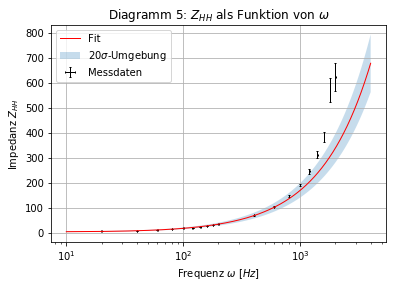

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import odr
from scipy.stats import chi2

#Werte aus Tabelle 4: U_HH über I_HH

f=np.array([20.0,40.0,60.0,80,100,120,140,160,180,200,400,600,800,1000,1200,1400,1600,1800,2000])
fehler_f=np.array([0.1,0.1,0.4,0.4,1,1,1,1,1,1,1,2,2,5,5,5,5,5,5])

U_HH=np.array([7.00,7.08,7.08,7.02,7.02,6.98,6.96,6.90,6.94,6.94,6.96,6.88,6.86,6.86,6.86,6.86,6.88,6.86,6.86])
fehler_U_HH=np.array([0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02])

I_HH=np.array([1.451,0.925,0.656,0.503,0.408,0.342,0.295,0.257,0.229,0.207,0.101,0.066,0.047,0.036,0.028,0.022,0.018,0.012,0.011])
fehler_I_HH=np.array([0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001])

Z_HH=U_HH/I_HH
fehler_Z_HH=np.sqrt((fehler_U_HH/U_HH)**2+(fehler_I_HH/I_HH)**2)*Z_HH

#Fit von Messwerten 

def reg(p, x):
    (a, b) = p
    return np.sqrt(a**2+(b*x)**2)

# Model
model_func = odr.Model(reg)

#Messdaten
x=f
y=Z_HH
delta_x = fehler_f
delta_y = fehler_Z_HH


#Messdaten einlesen
data = odr.RealData(x, y, sx=delta_x, sy=delta_y)

#Model und Daten verknüpfen
odr = odr.ODR(data, model_func, beta0=[ 1.0, 1.0])

#Regression
out = odr.run()

#1-Sigma
popt = out.beta
perr = out.sd_beta

#Sigma-Umgebung
nstd = 20 #um n-Sigma-Umgebung zu zeichnen
popt_top = popt + nstd * perr
popt_bot = popt - nstd * perr

#Plot-Umgebung
x_fit = np.linspace(min(x)/2, max(x)*2, 1000)
fit = reg(popt, x_fit)
fit_top = reg(popt_top, x_fit)
fit_bot = reg(popt_bot, x_fit)

#Plot
fig, ax = plt.subplots(1)
plt.errorbar(x, y, yerr=delta_y, xerr=delta_x, lw= 1, ecolor='k', fmt='none', capsize=1, label='Messdaten')
plt.title('Diagramm 5: '+r'${Z_{HH}}$'+' als Funktion von '+r'$\omega$')
plt.grid(True)
plt.xscale('log')
plt.xlabel('Frequenz '+r'$\omega$'+' '+r'${[Hz]}$')
plt.ylabel('Impedanz '+r'${Z_{HH}}$' + ' ' + r'${}$')
plt.plot(x_fit, fit, 'r', lw=1, label='Fit')
ax.fill_between(x_fit, fit_top, fit_bot, alpha=.25, label=str(nstd)+r'$\sigma$'+'-Umgebung')
plt.legend(loc='best')

#Output
plt.savefig("figures/245_Diagramm5.pdf", format="pdf")

#Chi-Quadrat
dof=x.size-popt.size
chisquare=np.sum(((reg([*popt], x)-y)/delta_y)**2)
chisquare_red=chisquare/dof
prob=round(1-chi2.cdf(chisquare,dof),2)*100

#Ausgabe
print("R_HH [Ohm] = ", abs(popt[0]), ", Standardfehler = ", perr[0])
print("L_HH [H] = ", abs(popt[1]), ", Standardfehler = ", perr[1])
print('\n')
print("Chi-Quadrat = ", chisquare)
print("Freiheitsgrade = ", dof)
print("Chi-Quadrat reduziert = ", chisquare_red)
print("Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten= "+str(prob)+"%")